In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

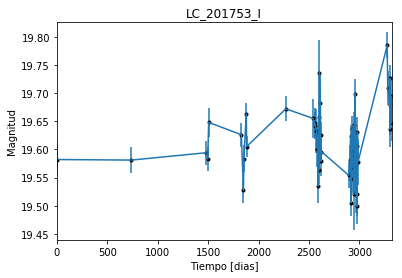

In [2]:
data = np.genfromtxt('LC_201753_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_201753_I')
plt.savefig("LC_201753_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

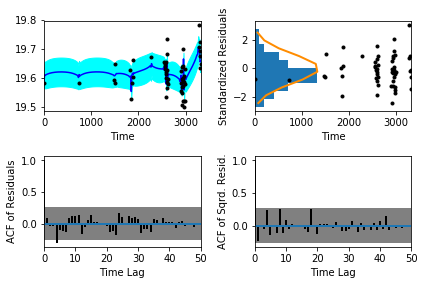

In [5]:
sample.assess_fit()

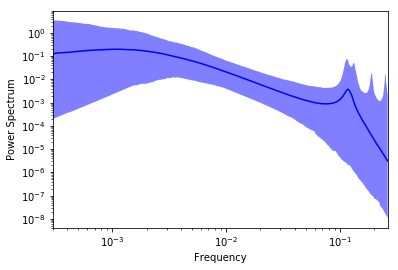

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

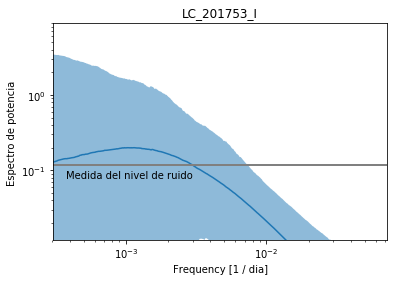

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_201753_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_201753_I')

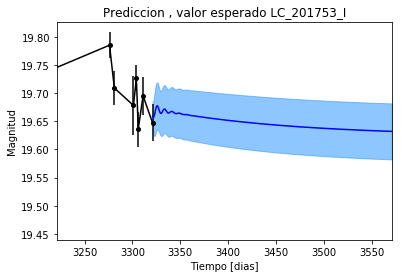

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_201753_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_201753_I')

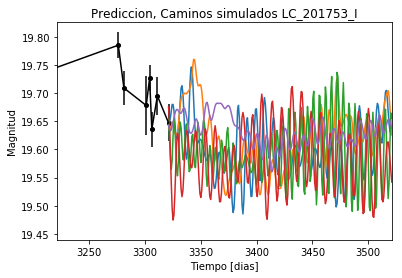

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_201753_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


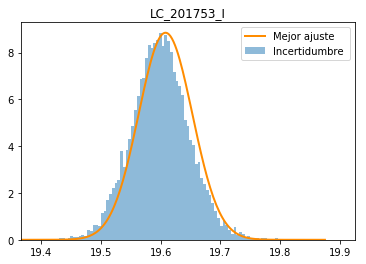

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_201753_I')
plt.savefig("Mejor_ajuste_LC_201753_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_201753_I')

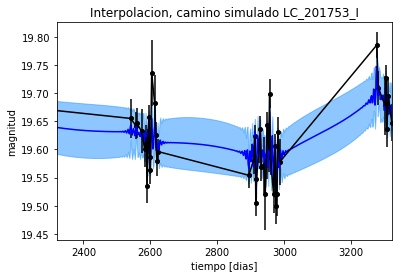

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_I')

Text(0.5,1,'Interpolacion, camino simulado LC_201753_I')

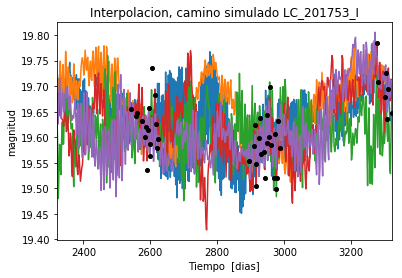

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 287.493833838
Median: 0.00427043384902
Standard deviation: 0.0509216875354
68% credibility interval: [ 0.00128962  0.01226662]
95% credibility interval: [ 0.00044934  0.10512269]
99% credibility interval: [  3.59334460e-04   4.27952170e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 192.060663025
Median: 0.00418968345989
Standard deviation: 0.042850563425
68% credibility interval: [ 0.00124509  0.01163247]
95% credibility interval: [ 0.00044934  0.06708714]
99% credibility interval: [  3.58850655e-04   3.66720082e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 401.8693845
Median: 0.0410411492399
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 535.342789854
Median: 105.780301771
Standard deviation: 2.63057724479
68% credibility interval: [ 102.74317362  107.73152621]
95% credibility interval: [  98.80108059  108.86711855]
99% credibility interval: [  96.4102284  109.3154583]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 377.768250577
Median: 0.43888411508
Standard deviation: 1.08192211284
68% credibility interval: [ 0.06311593  2.02391619]
95% credibility interval: [ 0.02389643  3.31366232]
99% credibility interval: [ 0.01316095  5.42559507]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 160.891050113
Median: 0.720619204354
Standard deviation: 2.67397288549
68% credibility interval: [ 0.54096208  2.99697419]
95% credibility interval: [ 0.3668383   8.0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4140.68248464
Median: 2.71186943282
Standard deviation: 8.72533551097e+72
68% credibility interval: [  1.93155205e-44   3.97854845e+29]
95% credibility interval: [  2.55674670e-63   4.61833239e+36]
99% credibility interval: [  7.59114965e-77   1.93646257e+40]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 886.779562925
Median: 19.6175779591
Standard deviation: 0.0185705335378
68% credibility interval: [ 19.60169885  19.63429132]
95% credibility interval: [ 19.58254553  19.65491287]
99% credibility interval: [ 19.55753723  19.6754634 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 200.53297316
Median: 0.128548914543
Standard deviation: 0.106259811871
68% credibility interval: [ 0.11396819  0.2578567 ]
95% credibility interval: [ 0.03162531  0.44635839]
99% credibility interval: [ 0.         0.4856591]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 200.53297316
Median: 0.128548914543
Standard deviation: 0.106259811871
68% credibility interval: [ 0.11396819  0.2578567 ]
95% credibility interval: [ 0.03162531  0.44635839]
99% credibility interval: [ 0.         0.4856591]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2104.32835007
Median: 0.0
Standard deviation: 0.00762318841778
68% credibility

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 535.342789854
Median: 105.780301771
Standard deviation: 2.63057724479
68% credibility interval: [ 102.74317362  107.73152621]
95% credibility interval: [  98.80108059  108.86711855]
99% credibility interval: [  96.4102284  109.3154583]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 432.5723497
Median: 0.00345863515676
Standard deviation: 0.00244472216604
68% credibility interval: [ 0.00229753  0.00578232]
95% credibility interval: [ 0.0015147   0.01068585]
99% credibility interval: [ 0.00110769  0.01550759]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 540.528544847
Median: 1.15996223133
Standard deviation: 0.271566074424
68% credibility interval: [ 0.92024036  1.46713387]
95% credibility interval: [ 0.77037437  1.82565604]
99% credibility interval: [ 0.67475365  1.9642138 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 203.7560945
Median: 0.00140592898666
Standard deviation: 0.0394191705
68% credibility interval: [  3.29613702e-32   1.53980299e-02]
95% credibility interval: [  1.46623369e-39   1.38024605e-01]
99% credibility interval: [  2.87609079e-43   2.60158919e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 287.493833838
Median: (-0.0268319272155-0.840523000668j)
Standard deviation: 0.740354576341
68% credibility interval: [-0.07707346-0.72590331j -0.00810292-1.19565299j]
95% credibility interval: [-0.66050531-1.68422463j -0.00282331-2.80108087j]
99% credibility interval: [ -2.68890278e+00-1.39319087j  -2.25776500e-03-0.70730369j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 192.060663025
Median: (-0.0263245575569+2.70992554151j)
Standard deviation: 0.719892879534
68% credibility interval: [-0.07308896+0.79145924j -0.00782316+2.81650527j]
95% credibility interval: [-0.42152094+1.16241877j -0.00282331+2.80108087j]
99% credibility interval: [ -2.30417023e+00+2.65656967j  -2.25472516e-03+0.00364457j]
Posterior summary for